In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os, re, time
import numpy as np
import cv2
import time 
import android

In [14]:
!adb forward tcp:9999 tcp:59999

In [15]:
droide =android.Android()

delay = droide.dialogGetInput('Entrada 1','Demora antes de iniciar?','5').result

numOfShots= droide.dialogGetInput('Entrada 2','Total de imagenes a capturar?','5').result

delayBetweenShots= droide.dialogGetInput('Demora entre capturas?','5').result

In [16]:

droide.ttsSpeak('Tomando fotos en'+ delay + 'segundos' )
time.sleep(int(delay))
counter = 1
droide.ttsSpeak('Tomando foto')

while counter <= int(numOfShots):
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/foto_'+str(counter)+'_.jpg',1,1)
    counter+=1
    if counter != int(numOfShots):
        time.sleep(int(delayBetweenShots))
print 'Hecho sin errores...'

droide.ttsSpeak('Terminado sin errores')

del droide

Hecho sin errores...


In [65]:
!adb pull /sdcard/DCIM/CAMERA ./

pull: building file list...
pull: /sdcard/DCIM/CAMERA/foto_7_.jpg -> ./foto_7_.jpg
pull: /sdcard/DCIM/CAMERA/foto_6_.jpg -> ./foto_6_.jpg
pull: /sdcard/DCIM/CAMERA/foto_5_.jpg -> ./foto_5_.jpg
pull: /sdcard/DCIM/CAMERA/foto_4_.jpg -> ./foto_4_.jpg
pull: /sdcard/DCIM/CAMERA/foto_3_.jpg -> ./foto_3_.jpg
pull: /sdcard/DCIM/CAMERA/foto_2_.jpg -> ./foto_2_.jpg
pull: /sdcard/DCIM/CAMERA/carita.jpg -> ./carita.jpg
pull: /sdcard/DCIM/CAMERA/foto_1_.jpg -> ./foto_1_.jpg
pull: /sdcard/DCIM/CAMERA/20151031_144234.jpg -> ./20151031_144234.jpg
pull: /sdcard/DCIM/CAMERA/carota2.jpg -> ./carota2.jpg
pull: /sdcard/DCIM/CAMERA/carota.jpg -> ./carota.jpg
pull: /sdcard/DCIM/CAMERA/20151010_091547.jpg -> ./20151010_091547.jpg
12 files pulled. 0 files skipped.
4180 KB/s (1322755 bytes in 0.309s)


Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...
Encontramos 0 faces!
Hecho sin errores...


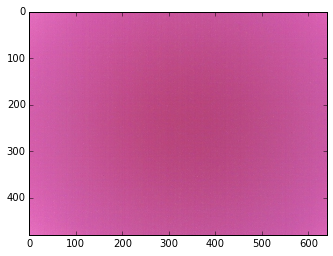

In [86]:
contador=1

while contador <= int(numOfShots):
    
    pic = os.path.join('.','foto_'+str(contador)+'_.jpg')
    img=cv2.imread(pic)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    
    caras_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    caras=caras_cascade.detectMultiScale(gray,1.3,3)
    
    print "Encontramos {0} faces!".format(len(caras))
    
    i=img.copy()
    for(x,y,w,h) in caras:
        cv2.rectangle(i,(x,y),(x+w+y+h),(0,255,0),2)
    plt.imshow(i)    
    
    contador +=1
    print 'Hecho sin errores...'

In [94]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	print m
	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()

4975.89717122


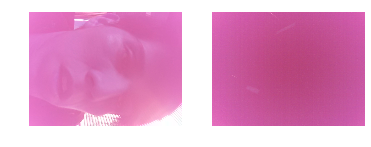

Hecho sin errores...
6118.33561198


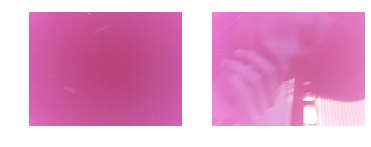

Hecho sin errores...
2249.10422201


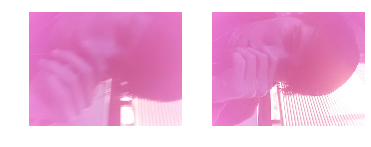

Hecho sin errores...
4631.78164388


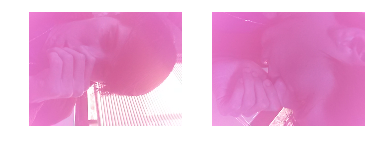

Hecho sin errores...
3387.03270182


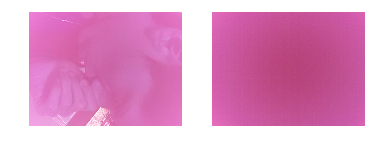

Hecho sin errores...
12.6433072917


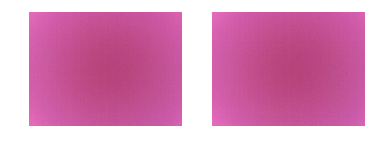

Hecho sin errores...


AttributeError: 'NoneType' object has no attribute 'astype'

In [97]:
contador=1

while contador <= int(numOfShots):
    
    pic = os.path.join('.','foto_'+str(contador)+'_.jpg')
    img=cv2.imread(pic)
    
    pic2 = os.path.join('.','foto_'+str(contador+1)+'_.jpg')
    img2=cv2.imread(pic2)
    
    compare_images(img,img2,'titulo')
    contador +=1
    print 'Hecho sin errores...'

In [96]:

compare_images(img,img2,'titulo')

AttributeError: 'NoneType' object has no attribute 'astype'

In [92]:
r,c=img.shape
print r,c

ValueError: too many values to unpack

In [42]:
cv2.getRotationMatrix2D((c/2,r/2),270,1)

NameError: name 'c' is not defined

In [ ]:
dst = cv2.wrapAffine(img, M, (c,r))